Import Some libraries which is used for analyze the data.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
data_path = 'talegaon.xlsx'
data = pd.read_excel(data_path, sheet_name='Sheet1')

In [8]:
data.columns = data.iloc[0]
data = data[1:]
data.columns = ['Sr No', 'Farmer Name', 'Village', 'No of Animals', 'Milk Production']
data = data.reset_index(drop=True)
data['No of Animals'] = pd.to_numeric(data['No of Animals'], errors='coerce')
data['Milk Production'] = pd.to_numeric(data['Milk Production'], errors='coerce')
data_cleaned = data.dropna(subset=['No of Animals', 'Milk Production'])

Basic statistics


In [9]:
print("Summary statistics:\n", data_cleaned[['No of Animals', 'Milk Production']].describe())
print("\nUnique villages:", data_cleaned['Village'].nunique())
print("\nVillage counts:\n", data_cleaned['Village'].value_counts())

Summary statistics:
        No of Animals  Milk Production
count    3132.000000      3132.000000
mean        9.902299        49.501916
std        80.019293       400.096333
min         2.000000        10.000000
25%         3.000000        15.000000
50%         4.000000        20.000000
75%         6.000000        30.000000
max      1879.000000      9395.000000

Unique villages: 15

Village counts:
 Village
Chincholi Gurav       415
Nilwande              344
Lohare                344
Kauthe Kamaleshwar    335
Mendhwan              290
Kasare                206
Devkauthe             205
Wadzari kh            170
Mirpur                163
Karule                158
Tigaon                155
Wadzari bk            124
Hasanabad              73
ajampur                70
arampur                65
Name: count, dtype: int64


 Total Milk Production Per Village 

C:\Users\AJINKYA\AppData\Local\Temp\ipykernel_18328\1968194721.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


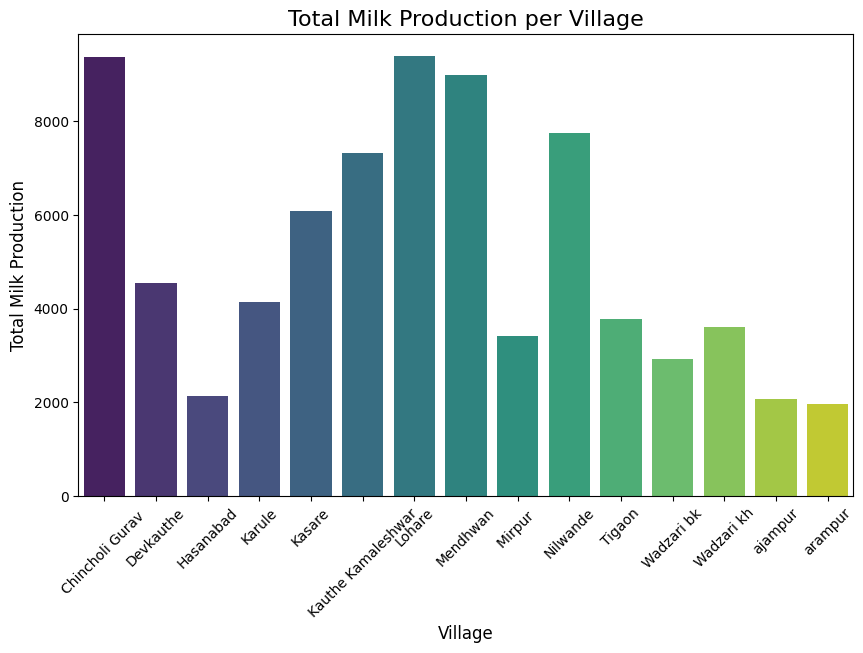

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(
    x=data_cleaned.groupby('Village')['Milk Production'].sum().index,
    y=data_cleaned.groupby('Village')['Milk Production'].sum().values,
    palette='viridis'
)
plt.title('Total Milk Production per Village', fontsize=16)
plt.xlabel('Village', fontsize=12)
plt.ylabel('Total Milk Production', fontsize=12)
plt.xticks(rotation=45)
plt.show()

   Pie Chart  - Distribution of farmers across villages 

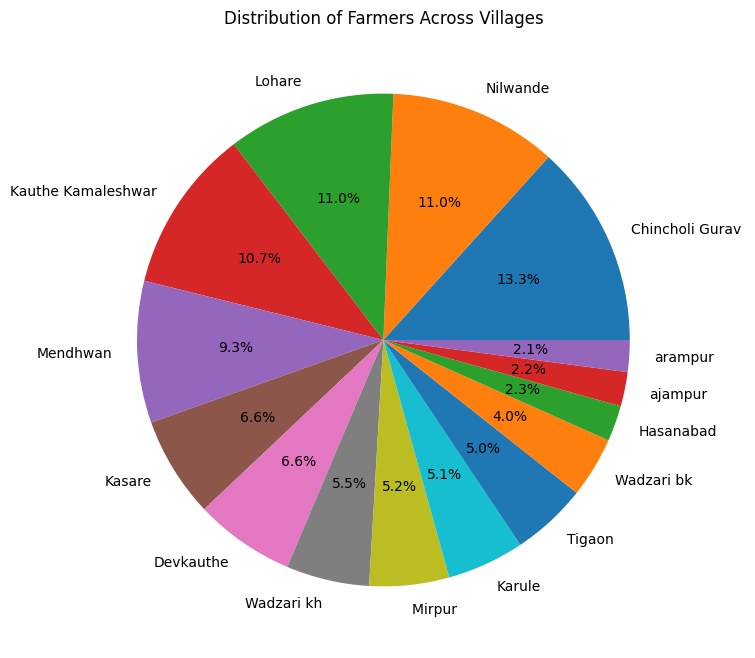

In [12]:
village_counts = data_cleaned['Village'].value_counts()
village_counts.plot(
    kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Distribution of Farmers Across Villages'
)
plt.ylabel('')
plt.show()

 Scatter plot: Relationship between No of Animals and Milk Production


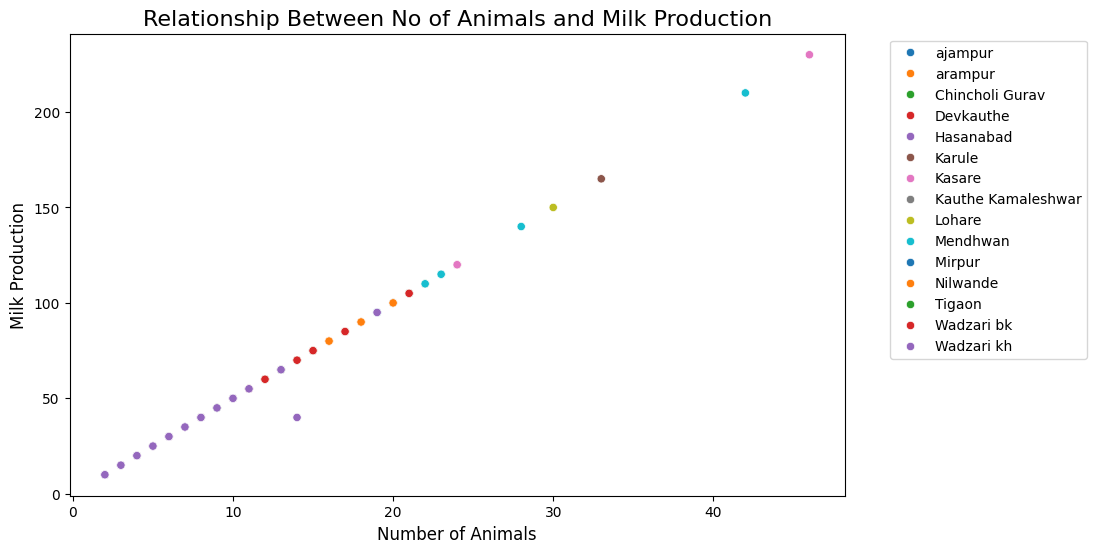

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(  # scatterplot is the chart in which data  shows in the graph 
    x='No of Animals', y='Milk Production', hue='Village', data=data_cleaned, palette='tab10'
)
plt.title('Relationship Between No of Animals and Milk Production', fontsize=16)
plt.xlabel('Number of Animals', fontsize=12)
plt.ylabel('Milk Production', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#  Top 5 farmers with the highest milk production


In [15]:
print("\nTop 5 Farmers by Milk Production:\n")
print(data_cleaned.sort_values(by='Milk Production', ascending=False)[['Farmer Name', 'Village', 'Milk Production']].head())


Top 5 Farmers by Milk Production:

     Farmer Name Village  Milk Production
1888       Total     NaN           9395.0
555        Total     NaN           9375.0
2180       Total     NaN           8990.0
2691       Total     NaN           7745.0
1542       Total     NaN           7320.0


# Total number of animals per village


Total Number of Animals per Village:
 Village
Chincholi Gurav       1875.0
Devkauthe              908.0
Hasanabad              427.0
Karule                 830.0
Kasare                1218.0
Kauthe Kamaleshwar    1464.0
Lohare                1879.0
Mendhwan              1798.0
Mirpur                 684.0
Nilwande              1549.0
Tigaon                 757.0
Wadzari bk             586.0
Wadzari kh             727.0
ajampur                414.0
arampur                391.0
Name: No of Animals, dtype: float64


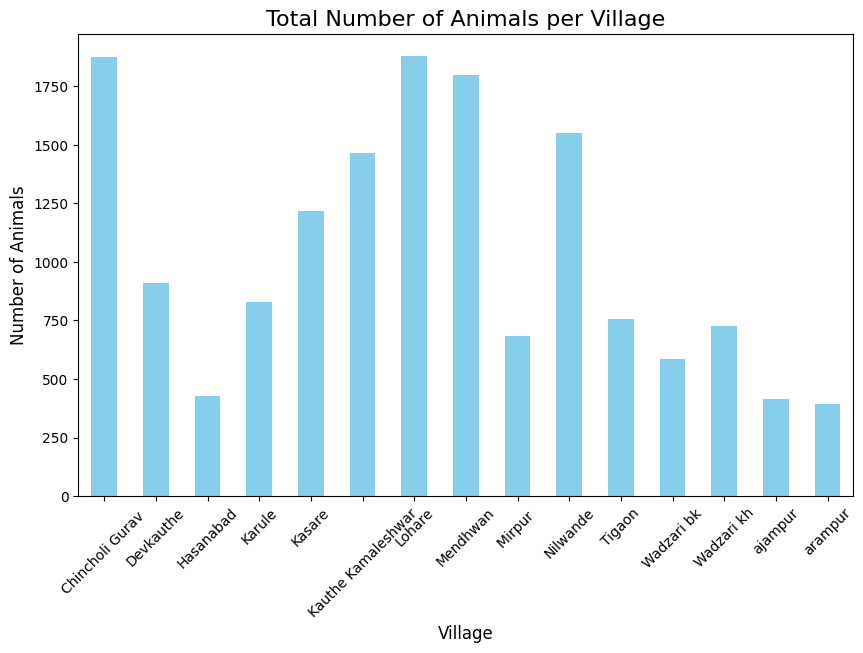

In [16]:
animals_per_village = data_cleaned.groupby('Village')['No of Animals'].sum()
print("\nTotal Number of Animals per Village:\n", animals_per_village)

plt.figure(figsize=(10, 6))
animals_per_village.plot(kind='bar', color='skyblue')
plt.title('Total Number of Animals per Village', fontsize=16)
plt.xlabel('Village', fontsize=12)
plt.ylabel('Number of Animals', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Average milk production per animal per village


C:\Users\AJINKYA\AppData\Local\Temp\ipykernel_18328\1524344532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Milk Per Animal'] = data_cleaned['Milk Production'] / data_cleaned['No of Animals']



Average Milk Production per Animal per Village:
 Village
Chincholi Gurav       5.000000
Devkauthe             5.000000
Hasanabad             5.000000
Karule                5.000000
Kasare                5.000000
Kauthe Kamaleshwar    5.000000
Lohare                5.000000
Mendhwan              5.000000
Mirpur                5.000000
Nilwande              5.000000
Tigaon                5.000000
Wadzari bk            5.000000
Wadzari kh            4.987395
ajampur               5.000000
arampur               5.000000
Name: Milk Per Animal, dtype: float64


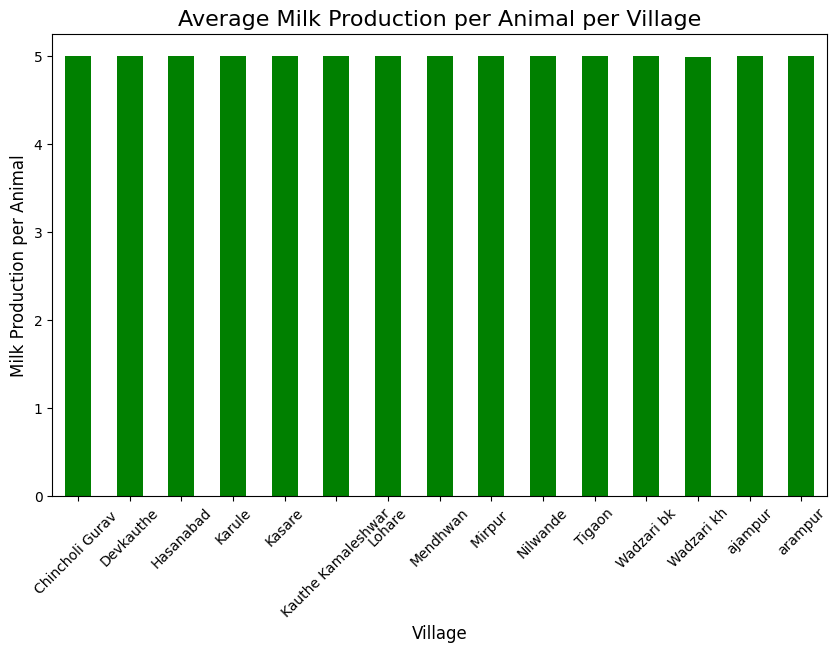

In [17]:
data_cleaned['Milk Per Animal'] = data_cleaned['Milk Production'] / data_cleaned['No of Animals']
avg_milk_per_village = data_cleaned.groupby('Village')['Milk Per Animal'].mean()

print("\nAverage Milk Production per Animal per Village:\n", avg_milk_per_village)

plt.figure(figsize=(10, 6))
avg_milk_per_village.plot(kind='bar', color='green')
plt.title('Average Milk Production per Animal per Village', fontsize=16)
plt.xlabel('Village', fontsize=12)
plt.ylabel('Milk Production per Animal', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Top 3 villages contributing the most to milk production


In [19]:
top_villages = data_cleaned.groupby('Village')['Milk Production'].sum().sort_values(ascending=False).head(3)
print("\nTop 3 Villages by Milk Production:\n", top_villages)


Top 3 Villages by Milk Production:
 Village
Lohare              9395.0
Chincholi Gurav     9375.0
Mendhwan            8990.0
Name: Milk Production, dtype: float64


#  Median milk production per village



Median Milk Production per Village:
 Village
Chincholi Gurav       20.0
Devkauthe             20.0
Hasanabad             25.0
Karule                20.0
Kasare                20.0
Kauthe Kamaleshwar    15.0
Lohare                20.0
Mendhwan              20.0
Mirpur                15.0
Nilwande              15.0
Tigaon                20.0
Wadzari bk            20.0
Wadzari kh            15.0
ajampur               25.0
arampur               25.0
Name: Milk Production, dtype: float64


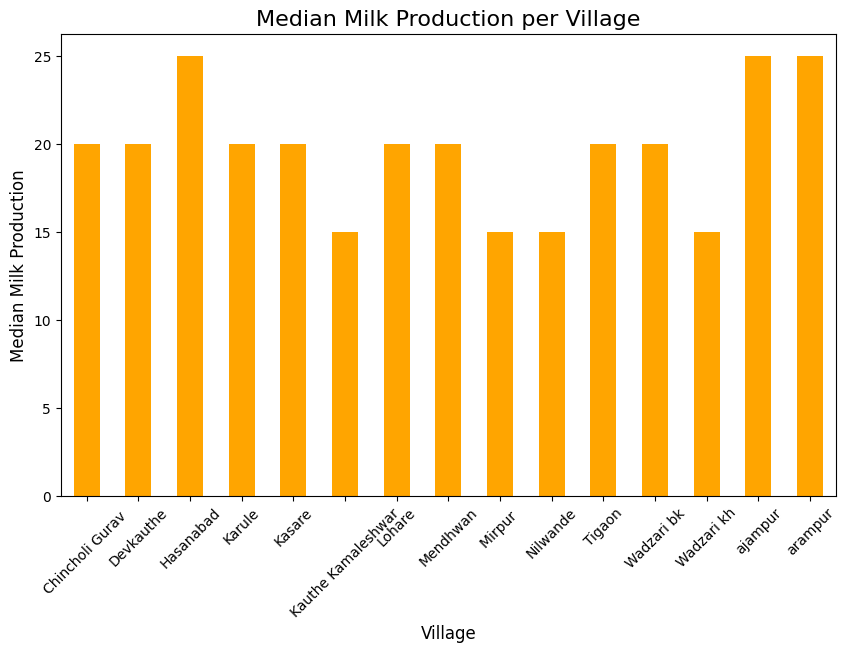

In [20]:
median_milk_production = data_cleaned.groupby('Village')['Milk Production'].median()
print("\nMedian Milk Production per Village:\n", median_milk_production)
# median means the middle value of of data which is arranged in  ascending or descending order 
plt.figure(figsize=(10, 6))
median_milk_production.plot(kind='bar', color='orange')
plt.title('Median Milk Production per Village', fontsize=16)
plt.xlabel('Village', fontsize=12)
plt.ylabel('Median Milk Production', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#  Percentage contribution of each village to total milk production



Percentage Contribution of Each Village to Total Milk Production:
 Village
Chincholi Gurav       6.046827
Devkauthe             2.928277
Hasanabad             1.377064
Karule                2.676729
Kasare                3.928019
Kauthe Kamaleshwar    4.721362
Lohare                6.059727
Mendhwan              5.798504
Mirpur                2.205882
Nilwande              4.995485
Tigaon                2.441305
Wadzari bk            1.889835
Wadzari kh            2.325206
ajampur               1.335139
arampur               1.260965
Name: Milk Production, dtype: float64


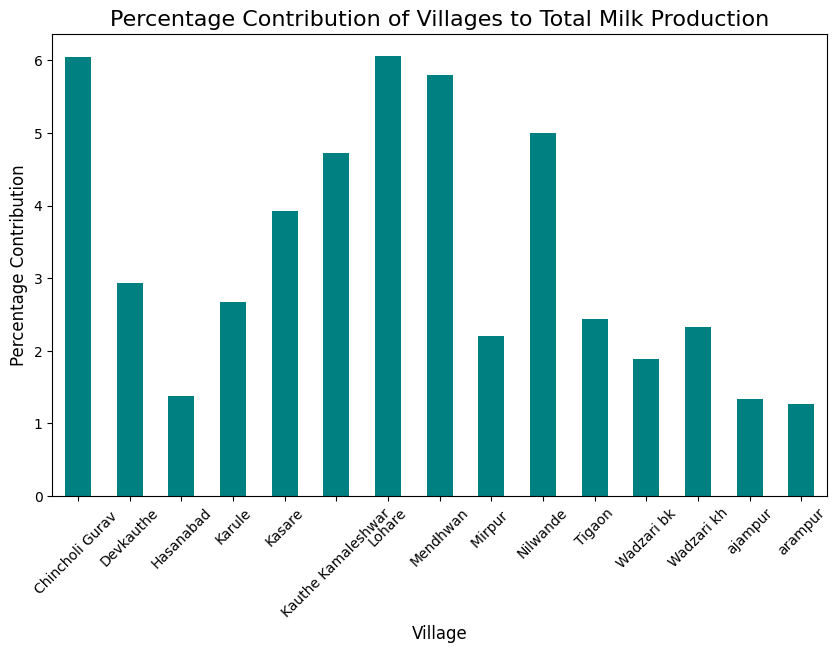

In [30]:
total_milk = data_cleaned['Milk Production'].sum()
milk_contribution = (data_cleaned.groupby('Village')['Milk Production'].sum() / total_milk) * 100
print("\nPercentage Contribution of Each Village to Total Milk Production:\n", milk_contribution)

plt.figure(figsize=(10, 6))
milk_contribution.plot(kind='bar', color='teal')
plt.title('Percentage Contribution of Villages to Total Milk Production', fontsize=16)
plt.xlabel('Village', fontsize=12)
plt.ylabel('Percentage Contribution', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Total milk production trend if data contains dates (example for future extension)


In [24]:
if 'Date' in data_cleaned.columns:
    data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')
    milk_trend = data_cleaned.groupby('Date')['Milk Production'].sum()
    plt.figure(figsize=(12, 6))
    milk_trend.plot(marker='o', linestyle='-', color='magenta')
    plt.title('Milk Production Trend Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Milk Production', fontsize=12)
    plt.grid()
    plt.show()

#  Top 10 farmers per village by milk production


In [25]:
top_10_farmers = data_cleaned.groupby('Village').apply(
    lambda x: x.nlargest(10, 'Milk Production')[['Farmer Name', 'Milk Production']]
).reset_index(drop=True)
print("\nTop 10 Farmers per Village by Milk Production:\n", top_10_farmers)


Top 10 Farmers per Village by Milk Production:
                       Farmer Name  Milk Production
0    Gangadhar Nivrutti Sonawane              80.0
1           Pravin Ashok Sonawane             80.0
2           BHIMRAJ BABURAO GODGE             70.0
3            Lankabai Ashok Godge             70.0
4         DHNYANDEV TRIMBAK GODGE             65.0
..                            ...              ...
145      Bhaupatil Changdev Dighe             55.0
146          Gorakh Trimbak Dighe             55.0
147          Govind Savitra Dighe             55.0
148        Kondaji Vithoba Rahane             55.0
149      Mothyabhau Sukhdev Dighe             50.0

[150 rows x 2 columns]


C:\Users\AJINKYA\AppData\Local\Temp\ipykernel_18328\998804784.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_farmers = data_cleaned.groupby('Village').apply(


#  Bottom 5 farmers per village by milk production


In [26]:
bottom_5_farmers = data_cleaned.groupby('Village').apply(
    lambda x: x.nsmallest(5, 'Milk Production')[['Farmer Name', 'Milk Production']]
).reset_index(drop=True)
print("\nBottom 5 Farmers per Village by Milk Production:\n", bottom_5_farmers)


Bottom 5 Farmers per Village by Milk Production:
                  Farmer Name  Milk Production
0         AHMED KANKAR PATEL             10.0
1      Anil Bhagvat Sonavane             10.0
2          Anita Dilip Ghane             10.0
3             ASHOK SONAWANE             10.0
4   Ashok Suryabhan Kandakar             10.0
..                       ...              ...
70       Dattu Ramnath Barde             10.0
71    Eknath Tukaram Gavhane             10.0
72    Ravindra Prakash Dighe             10.0
73      Rita Balasaheb Dighe             10.0
74        Sanjay Kisan Dighe             10.0

[75 rows x 2 columns]


C:\Users\AJINKYA\AppData\Local\Temp\ipykernel_18328\1107089316.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_5_farmers = data_cleaned.groupby('Village').apply(


#  Farmer with maximum milk production in each village


In [27]:
max_producer_per_village = data_cleaned.loc[data_cleaned.groupby('Village')['Milk Production'].idxmax()]
print("\nFarmer with Maximum Milk Production in Each Village:\n", max_producer_per_village[['Village', 'Farmer Name', 'Milk Production']])


Farmer with Maximum Milk Production in Each Village:
                  Village                   Farmer Name  Milk Production
250     Chincholi Gurav   Gangadhar Nivrutti Sonawane              80.0
632            Devkauthe         Jayshri Akash Mungase            120.0
800            Hasanabad      Manisha Changdev Bhagwat             80.0
867               Karule          BHAGWAN KISAN AKHADE            165.0
1046              Kasare      DATTATRAY KARBHARI KARLE            230.0
1379  Kauthe Kamaleshwar     Nanda Bhausabheb Jondhale            105.0
1813              Lohare      SHAILESH BALASAHEB VIKHE            150.0
1969            Mendhwan       Jalindar Maruti Yelmame            210.0
2205             Mirpur        Bhagwan Bhanudas Kapkar             75.0
2539            Nilwande         Pawar Sadashiv Khandu            100.0
2842              Tigaon         Vilas Bhausaheb Sanap            105.0
2888          Wadzari bk     Gangadhar Ranganath Gorde            105.0
3010     